<a href="https://www.kaggle.com/code/barborakudlov/redwineqa-catboostclass-cv-roc-auc-80?scriptVersionId=118224781" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


# Data set loded from Kaggle here:

https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

In [2]:
!pip install --upgrade pandas

In [3]:
data_wine = pd.read_csv("/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")

In [4]:
data_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
data_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Pre-processing of data- updated target "guality"

In [6]:
data_wine["quality_good"] = [1 if x > 6.5 else 0 for x in data_wine["quality"]]

In [7]:
data_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_good
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [8]:
data_wine.drop("quality", axis = 1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_good
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


# Vizulization of "quality"

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='quality_good', ylabel='count'>

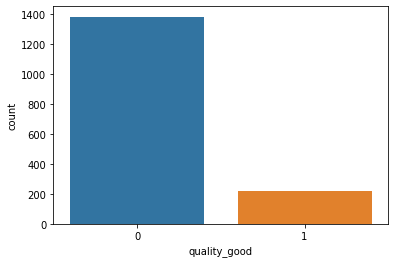

In [9]:
import seaborn as sns

sns.countplot(data_wine.quality_good)

In [10]:
import plotly.express as px

fig = px.scatter(data_wine, x="fixed acidity", y="density", color="quality")

fig.show()

fig = px.scatter(data_wine, x="citric acid", y="density", color="quality")

fig.show()

In [11]:
data_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_good
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000


In [12]:
data_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  quality_good          1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


# Main characteristics of our DS

- 1.) target- Output variable (based on sensory data): 12 - quality (score theoretically between 0 and 10, practically between 3 and 8)
- 2.) no missing values
- 3.) no cathegorical predictors


# Strategy

- 1.) first idea- algoritm-  boosting methods and from sklearn RandomForest, SVC
- 2.) second idea- advanced: data set is unbalanced so we use standardization, normalization or logaritmics function, use add method KNearestNeighboor
- 3.) third idea- smote, because of adding syntetical points, good for multi-label problems

In [13]:
data_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality_good'],
      dtype='object')

In [14]:
data_wine.shape

(1599, 13)

In [15]:
X = data_wine.drop(['quality_good','quality'], axis=1) #rozdělění prediktorů
y = data_wine['quality_good'] #stanovení targetu

In [16]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [17]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality_good, Length: 1599, dtype: int64

# Modelling

In [18]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42, stratify=y) #stratify!! kvůli nevyváženosti zaručuje rovnoměrné rozdělení tříd v jednotlivých splitech

#categories = ['3', '4', '5', '6', '7', '8', '9', '10'] #qaulity categories of our dataset
#train, test = train_test_split(data_wine, random_state=42, test_size=0.33, shuffle=True)
#X_train = train.comment_text
#X_test = test.comment_text

In [19]:
!pip install xgboost

In [20]:
!pip install LightGBM

In [21]:
!pip install catboost

# First idea- without standardization of the data

In [22]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

In [23]:
MLA = [
    SVC(gamma = 1),
    RandomForestClassifier(),
    xgb.XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3),
    #lgb.LGBMClassifier(),
]

In [24]:
from sklearn.metrics import roc_auc_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix

#Do some preperation for the loop
col = []
algorithms = pd.DataFrame(columns = col)
idx = 0

#Train and score algorithms
for a in MLA:
    
    a.fit(X_train, y_train)
    pred = a.predict(X_test)
    auc = roc_auc_score(y_test, pred) #auc = roc_auc_score(y_test, pred, average="weighted")#Other way: a.score(X_test, y_test)
    f1 = f1_score(y_test, pred) #f1 = f1_score(y_test, pred, average='weighted')- main score
    #cv = cross_val_score(X_test, y_test)
    
    Alg = a.__class__.__name__
    
    algorithms.loc[idx, 'Algorithm'] = Alg
    algorithms.loc[idx, 'AUC Score'] = round(auc * 100, 2)
    algorithms.loc[idx, 'F1 Score'] = round(f1 * 100, 2)
    #algorithms.loc[idx, 'CV Score'] = round(cv * 100, 2)
    
    print(confusion_matrix(y_test, pred))

    idx+=1

[[277   0]
 [ 30  13]]
[[275   2]
 [ 16  27]]
[[271   6]
 [ 15  28]]


In [25]:
algorithms.sort_values(by='F1 Score', ascending=False)

,Algorithm,AUC Score,F1 Score
1,RandomForestClassifier,81.03,75.00
2,XGBClassifier,81.48,72.73
0,SVC,65.12,46.43


In [26]:
from catboost import CatBoostClassifier

model = CatBoostClassifier()
model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=False)

In [27]:
from sklearn.metrics import f1_score, roc_auc_score

y_pred = model.predict(X_test)
print("ROC-AUC CatBoostClass score is: ", round(roc_auc_score(y_test, y_pred)*100, 2))
print("F1 score CatBoostClass is: ", round(f1_score(y_test, y_pred)*100, 2)) 

ROC-AUC CatBoostClass score is:  80.31
F1 score CatBoostClass is:  71.05


# Hyperparameter tunning of best and chose algoritm- CatBoostClassifier

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {
            'iterations':[100,500,1000],
            'learning_rate':[0.01,0.1,0.5],
            'depth':[3,6,10]
            }

In [29]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator=CatBoostClassifier(), param_grid=param_grid, cv=5, n_jobs=1, verbose=1)
grid.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=False)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f015f6d6e50>,
             n_jobs=1,
             param_grid={'depth': [3, 6, 10], 'iterations': [100, 500, 1000],
                         'learning_rate': [0.01, 0.1, 0.5]},
             verbose=1)

In [30]:
y_predict_CB = grid.predict(X_test)

In [31]:
print("ROC-AUC CatBoostClass score is: ", round(roc_auc_score(y_test, y_predict_CB)*100, 2))

ROC-AUC CatBoostClass score is:  80.49


In [32]:
grid.score(X_train, y_train) #not applicable fot that task

0.9992181391712275

In [33]:
grid.best_params_

{'depth': 10, 'iterations': 100, 'learning_rate': 0.5}

# Confusion matrix - For Catboosts after GridSearchCV

In [34]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred) #snaha je mít co největší hodnoty po diagonále

array([[271,   6],
       [ 16,  27]])

In [35]:
#vypsání true and false positive and negative
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("False positive: ", fp) #272 z 32 561 tzn. cca 1%, falešně pozitivní jsou ti, které jsme misclasifikovali, že mají příjem vyšší 50K
print("False negative: ", fn) #522 cca 6%

#pro marketingovou kampaň bychom chtěli ideálně poměr fn a fp převrácený, kdy dávám nabídky někomu, kdo 

False positive:  6
False negative:  16


# Output submission - úřidat unikátní ID

In [36]:
y_predict_CB

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,

In [37]:
#Save predictions
target = pd.Series(y_predict_CB, name= "Good_quality")
target

0      0
1      0
2      0
3      0
4      0
      ..
315    0
316    0
317    0
318    0
319    0
Name: Good_quality, Length: 320, dtype: int64

In [38]:
#Save predictions
target.to_csv("predictions.csv", index= False, header= True)

In [39]:
pd.read_csv("predictions.csv").head()

,Good_quality
0,0
1,0
2,0
3,0
4,0


In [40]:
#Save model
import joblib #seriliazce modelu a uložení pomocí joblib do formátu pickle

saved_model = joblib.dump(grid, filename="model.pkl")

# Second idea- with standardization of the data

In [41]:
X_st = data_wine.drop(['quality_good','quality'], axis=1) #rozdělění prediktorů
y_st = data_wine['quality_good'] #stanovení targetu

In [42]:
X_st

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [43]:
y_st

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality_good, Length: 1599, dtype: int64

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [45]:
data_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality_good'],
      dtype='object')

In [46]:
data_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_good
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000


In [47]:
ss_scaler = StandardScaler()
mm_scaler = MinMaxScaler()


standard_data = ss_scaler.fit_transform(X_st)
scaled_data = mm_scaler.fit_transform(X_st)

In [48]:
standard_data[:10]

array([[-0.52835961,  0.96187667, -1.39147228, -0.45321841, -0.24370669,
        -0.46619252, -0.37913269,  0.55827446,  1.28864292, -0.57920652,
        -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228,  0.04341614,  0.2238752 ,
         0.87263823,  0.62436323,  0.02826077, -0.7199333 ,  0.1289504 ,
        -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, -0.16942723,  0.09635286,
        -0.08366945,  0.22904665,  0.13426351, -0.33117661, -0.04808883,
        -0.58477711],
       [ 1.65485608, -1.38444349,  1.4841536 , -0.45321841, -0.26496041,
         0.10759209,  0.41150046,  0.6642772 , -0.97910442, -0.46118037,
        -0.58477711],
       [-0.52835961,  0.96187667, -1.39147228, -0.45321841, -0.24370669,
        -0.46619252, -0.37913269,  0.55827446,  1.28864292, -0.57920652,
        -0.96024611],
       [-0.52835961,  0.73841761, -1.39147228, -0.5241662 , -0.26496041,
        -0.27493098, -0.19667889,  0.55827446,  1.28864292, -0.57920652,
        -0.960

In [49]:
scaled_data[:10]

array([[0.24778761, 0.39726027, 0.        , 0.06849315, 0.10684474,
        0.14084507, 0.09893993, 0.56754772, 0.60629921, 0.13772455,
        0.15384615],
       [0.28318584, 0.52054795, 0.        , 0.11643836, 0.14357262,
        0.33802817, 0.2155477 , 0.49412628, 0.36220472, 0.20958084,
        0.21538462],
       [0.28318584, 0.43835616, 0.04      , 0.09589041, 0.13355593,
        0.1971831 , 0.16961131, 0.50881057, 0.40944882, 0.19161677,
        0.21538462],
       [0.5840708 , 0.10958904, 0.56      , 0.06849315, 0.10517529,
        0.22535211, 0.19081272, 0.58223201, 0.33070866, 0.1497006 ,
        0.21538462],
       [0.24778761, 0.39726027, 0.        , 0.06849315, 0.10684474,
        0.14084507, 0.09893993, 0.56754772, 0.60629921, 0.13772455,
        0.15384615],
       [0.24778761, 0.36986301, 0.        , 0.06164384, 0.10517529,
        0.16901408, 0.12014134, 0.56754772, 0.60629921, 0.13772455,
        0.15384615],
       [0.2920354 , 0.32876712, 0.06      , 0.04794521, 0.

Text(0.5, 1.0, 'Standardized data')

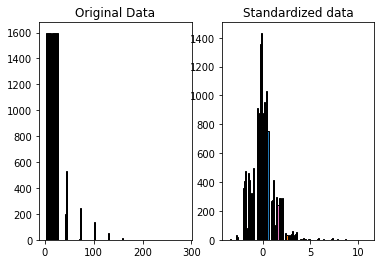

In [50]:
import numpy as np
import matplotlib.pyplot as plt


#create log-transformed data
#data_standardized = np.cbrt(data_wine)

#define grid of plots
fig, axs = plt.subplots(nrows = 1, ncols = 2)

#create histograms
axs[0].hist(data_wine, edgecolor = "black")
axs[1].hist(standard_data, edgecolor = "black")

#set title
axs[0].set_title("Original Data")
axs[1].set_title("Standardized data")


Text(0.5, 1.0, 'Scaled data')

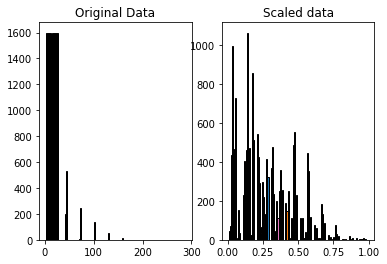

In [51]:
import numpy as np
import matplotlib.pyplot as plt


#create log-transformed data
#data_scaled_data = np.cbrt(data_wine)

#define grid of plots
fig, axs = plt.subplots(nrows = 1, ncols = 2)

#create histograms
axs[0].hist(data_wine, edgecolor = "black")
axs[1].hist(scaled_data, edgecolor = "black")

#set title
axs[0].set_title("Original Data")
axs[1].set_title("Scaled data")

Text(0.5, 1.0, 'Log data')

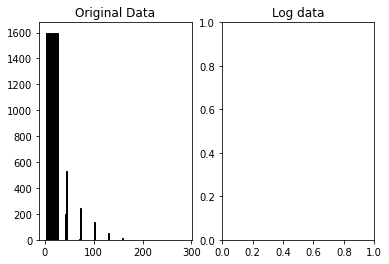

In [52]:
import numpy as np
import matplotlib.pyplot as plt


#create log-transformed data
data_log = np.log(data_wine)

#define grid of plots
fig, axs = plt.subplots(nrows = 1, ncols = 2)

#create histograms
axs[0].hist(data_wine, edgecolor = "black")
#axs[1].hist(data_log, edgecolor = "black")


#set title
axs[0].set_title("Original Data")
axs[1].set_title("Log data")

In [53]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_st, y_st, train_size=0.8, random_state=42)

In [54]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

In [55]:
MLA_2 = [
    SVC(gamma=1),
    RandomForestClassifier(),
    xgb.XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3),
    KNeighborsClassifier(),
    #CatBoostClassifier(),
    #lgb.LGBMClassifier(),
]

In [56]:
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.model_selection import cross_val_score

#Do some preperation for the loop
col = []
algorithms_2 = pd.DataFrame(columns = col)
idx = 0

#Train and score algorithms
for b in MLA_2:
    
    b.fit(X_train, y_train)
    pred = b.predict(X_test)
    auc = roc_auc_score(y_test, pred) #auc = roc_auc_score(y_test, pred, average="weighted")#Other way: a.score(X_test, y_test)
    f1 = f1_score(y_test, pred) #f1 = f1_score(y_test, pred, average='weighted')
    #cv = cross_val_score(X_test, y_test)
    
    Alg = b.__class__.__name__
    
    algorithms_2.loc[idx, 'Algorithm'] = Alg
    algorithms_2.loc[idx, 'AUC Score'] = round(auc * 100, 2)
    algorithms_2.loc[idx, 'F1 Score'] = round(f1 * 100, 2)
    #algorithms.loc[idx, 'CV Score'] = round(cv * 100, 2)

    idx+=1

In [57]:
algorithms_2.sort_values(by='F1 Score', ascending=False)

,Algorithm,AUC Score,F1 Score
2,XGBClassifier,76.89,64.29
1,RandomForestClassifier,74.62,63.16
0,SVC,62.77,40.68
3,KNeighborsClassifier,58.99,30.30


In [58]:
from catboost import CatBoostClassifier

model = CatBoostClassifier()
model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=False)

In [59]:
from sklearn.metrics import f1_score, roc_auc_score

y_pred = model.predict(X_test)
print("ROC-AUC CatBoostClass score is: ", round(roc_auc_score(y_test, y_pred)*100, 2))
print("F1 score CatBoostClass is: ", round(f1_score(y_test, y_pred)*100, 2)) 

ROC-AUC CatBoostClass score is:  77.08
F1 score CatBoostClass is:  65.06


# Third idea- with SMOTE

In [60]:
data_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_good
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [61]:
X_smote = data_wine.drop(['quality_good'], axis=1) #rozdělění prediktorů
y_smote = data_wine['quality_good'] #stanovení targetu

In [62]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
feature, label = smote.fit_resample(X_smote, y_smote)

In [63]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(feature, label, train_size=0.8, random_state=42)

In [64]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

In [65]:
MLA_3 = [
    SVC(gamma = 1),
    RandomForestClassifier(),
    xgb.XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3),
    #lgb.LGBMClassifier(),
]

In [66]:
from sklearn.metrics import roc_auc_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix

#Do some preperation for the loop
col = []
algorithms_3 = pd.DataFrame(columns = col)
idx = 0

#Train and score algorithms
for c in MLA_3:
    
    c.fit(X_train, y_train)
    pred = c.predict(X_test)
    auc = roc_auc_score(y_test, pred) #auc = roc_auc_score(y_test, pred, average="weighted")#Other way: a.score(X_test, y_test)
    f1 = f1_score(y_test, pred) #f1 = f1_score(y_test, pred, average='weighted')- main score
    #cv = cross_val_score(X_test, y_test)
    
    Alg = c.__class__.__name__
    
    algorithms_3.loc[idx, 'Algorithm'] = Alg
    algorithms_3.loc[idx, 'AUC Score'] = round(auc * 100, 2)
    algorithms_3.loc[idx, 'F1 Score'] = round(f1 * 100, 2)
    #algorithms.loc[idx, 'CV Score'] = round(cv * 100, 2)
    
    print(confusion_matrix(y_test, pred))

    idx+=1

[[291   0]
 [ 28 234]]
[[291   0]
 [  0 262]]
[[291   0]
 [  0 262]]


In [67]:
algorithms_3.sort_values(by='F1 Score', ascending=False)

,Algorithm,AUC Score,F1 Score
1,RandomForestClassifier,100.00,100.00
2,XGBClassifier,100.00,100.00
0,SVC,94.66,94.35


In [68]:
from catboost import CatBoostClassifier

model = CatBoostClassifier()
model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=False)

In [69]:
from sklearn.metrics import f1_score, roc_auc_score

y_pred = model.predict(X_test)
print("ROC-AUC CatBoostClass score is: ", round(roc_auc_score(y_test, y_pred)*100, 2))
print("F1 score CatBoostClass is: ", round(f1_score(y_test, y_pred)*100, 2)) 

ROC-AUC CatBoostClass score is:  100.0
F1 score CatBoostClass is:  100.0


# Summary

Conclusion:
- 1.) algoritm CatBoost used because of the best results of validation metrics of data set Red Wine (no cathegorical values, no missing values, but unbalanced target of data set)
- 2.) hyperparameters of algoritm CatBoost tunned, but no big difference results of validation metrics, althouth used for final targer subbmission
- 3.) standardization, normalization and logaritmization used, but no big difference results of validation metrics (badly)



TODO:
- 1.) add Pandas profilling
- 2.) add ROC Curve vizualization
- 3.) add classification_report as the next validation metrics (from sklearn.metrics import classification_report)
- 4.) add optima
- 5.) removing outlier >5 in standardized data
- 6.) finish logaritmic data vizualization
- 7.) add pipeline
- 8.) apply Shupliho method

Recommendation and lessons learn:
- 1.) smote used at the end as third idea, but recommend to used at the beginning before target "guality" changed to binary (0/1-bad/good), smote was used because of adding syntetical points, good for multi-label problems, not for our created binary (for multi-label classes- use methods one vs all, one vs rest)